In [1]:
%load_ext autoreload
%autoreload 2

In [50]:
import kala

import networkx as nx
import pandas as pd
import numpy as np

from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
from kala.models.shocks import RemovePlayer, RemoveRandomPlayer, RemoveEdge, SwapRandomEdge, RemoveRandomEdge, SwapEdge, AddEdge, AddRandomEdge

In [57]:
from helper_functions import helper_diagonal_sbm
from main_functions import montecarlo_game_network, montecarlo_game_sbm

# How shocks impact the population of savers?

### We first start by setting up the constant parameters

In [5]:
## These are the constants not refering to the interactions

num_players = 50
num_steps = 200
num_simulations = 3

# number of initial proportion of savers
threshold = 0.5

In [6]:
## These are the constants refering to the interactions

# How much more do savers win when interacting with another
differential_efficient = 0.3
# How much do savers lose when interacting with a non-saver
differential_inefficient = 0.5

# Number of games that players save in their memory
memory_length = 4
# Memory rule
update_rule = kala.models.memory_rules.AllPastMemoryRule()

# Standard deviation of log normal distribution
def standard_deviation(eta):
    return eta**2


In [7]:
## This is the network that we are going to use

# SBM network
g, pos = helper_diagonal_sbm(num_players, p_off=0.1)

# Scale-free network
#m = np.random.randint(1, num_players)
#g = nx.barabasi_albert_graph(num_players, m)

### Example

In [46]:
## At time t we can introduce a shock into the system. 
## To do so, we create a list of emply lists with size num_steps.

shocks = [[] for _ in range(num_steps)]

## We will introduce a shock at time t = 10
t = 10 
shocks[t].append(RemoveRandomEdge(rng=0))

## We can include a sequence of shocks at a given time. This is
## the reason why we are including shocks as a list within a list.

t = 20
shocks[t].append(SwapRandomEdge(rng=0))
shocks[t].append(RemoveRandomPlayer(rng=0))

In [47]:
## The available shocks are:

player = 0
pivot = 0
player1 = 1
player2 = 2

shock = RemovePlayer(player) #Remove a given node player from the network. The shock also removes the adjacent edges to the selected node.
shock = RemoveRandomPlayer() #Remove a random node from the nework. The shock also removes the adjacent edges to the random node.
shock = RemoveEdge(player1, player2) #Remove the edge between player1 and player2 from the network.
shock = RemoveRandomEdge() #Removes a random edge from the network.
shock = SwapEdge(pivot, player1, player2) #Remove edge (pivot, player1) and add edge (pivot, player2) to the network.
shock = SwapRandomEdge() #Swap an edge between three random players as for the shock SwapEdge().
shock = AddEdge(player1, player2) #Add an edge between player1 and player2 to the network.
shock = AddRandomEdge() #Add an edge between two random players in the network.



  0%|          | 0/3 [00:00<?, ?it/s]

removing edge (InvestorAgent(uuid='vaqB93'), InvestorAgent(uuid='rmHqUw'))
swapping edge: (InvestorAgent(uuid='s7GW2w'), InvestorAgent(uuid='lEClkA')) -> (InvestorAgent(uuid='s7GW2w'), InvestorAgent(uuid='jhvwDS'))
removing player InvestorAgent(uuid='hZma36')


 33%|███▎      | 1/3 [00:00<00:00,  2.29it/s]

50 50
removing edge (InvestorAgent(uuid='yvTtPb'), InvestorAgent(uuid='nBewnr'))
swapping edge: (InvestorAgent(uuid='t1RBMX'), InvestorAgent(uuid='hmrCUS')) -> (InvestorAgent(uuid='t1RBMX'), InvestorAgent(uuid='jyT4lN'))
removing player InvestorAgent(uuid='zhaI7P')


 67%|██████▋   | 2/3 [00:00<00:00,  2.33it/s]

50 50
removing edge (InvestorAgent(uuid='xRxLUd'), InvestorAgent(uuid='ovDtuW'))
swapping edge: (InvestorAgent(uuid='ln9dAi'), InvestorAgent(uuid='j4acqu')) -> (InvestorAgent(uuid='ln9dAi'), InvestorAgent(uuid='qyuGc0'))
removing player InvestorAgent(uuid='cdahWk')


100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

50 50


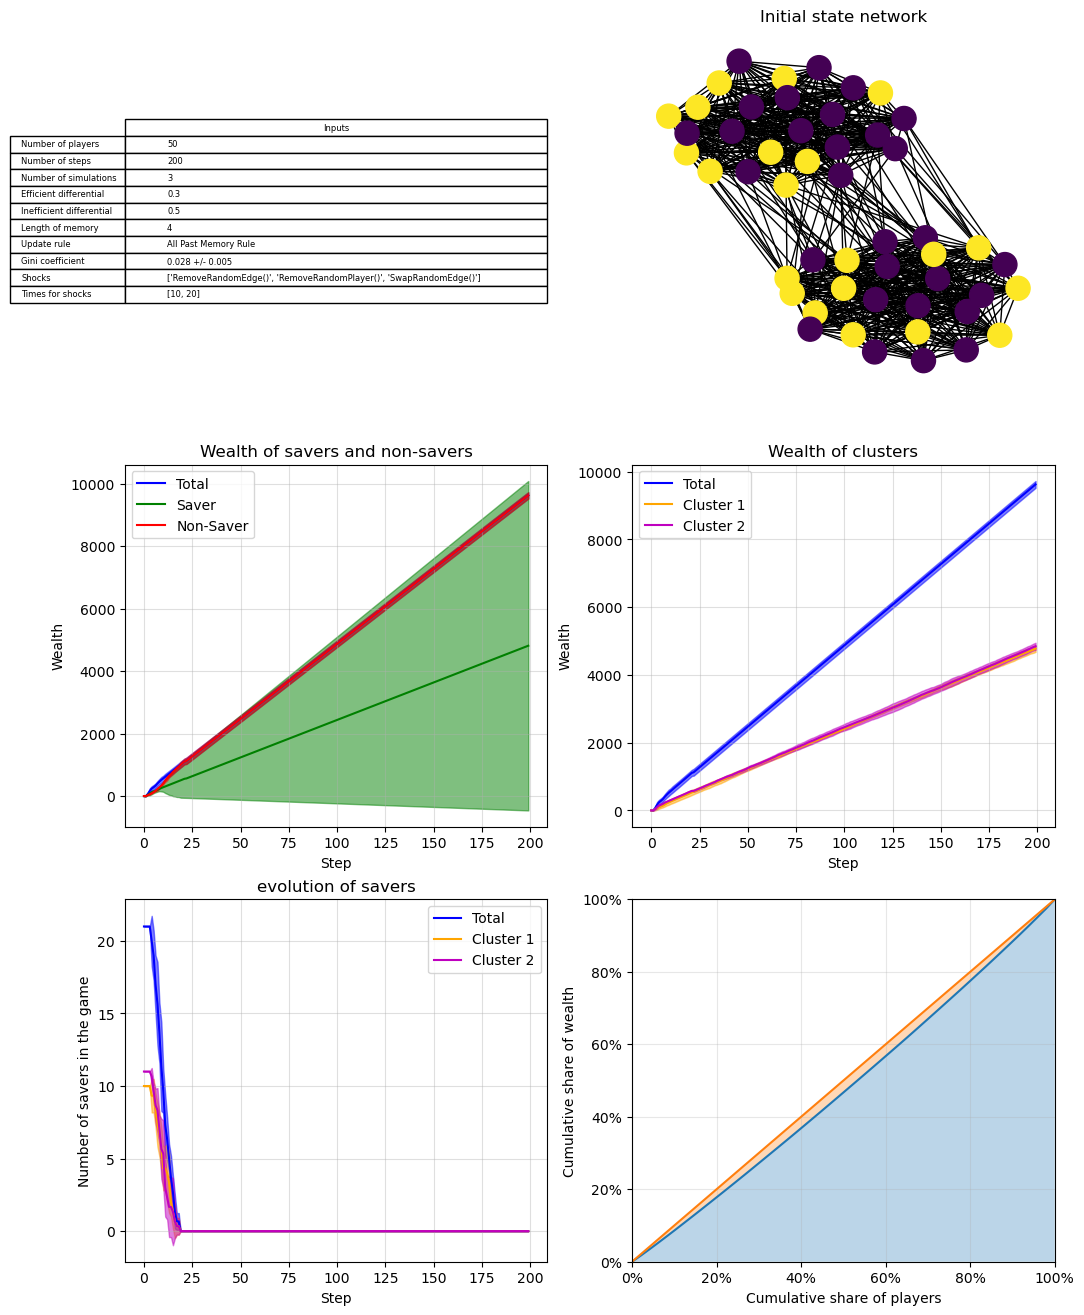

In [68]:
# If SBM
montecarlo_game_sbm(
# If another network, comment above and uncomment below
#montecarlo_game_network(g
    num_steps,
    num_simulations,
    num_players,
    threshold,
    differential_efficient,
    differential_inefficient,
    standard_deviation,
    memory_length,
    update_rule,
    shocks,
    )

### Shocks at random times

In [39]:
shocks = [[] for _ in range(num_steps)]

## We can choose in which step and how many shocks we want

t1, t2, t3, t4, t5, t6 = np.random.randint(0, high=num_steps, size=6, dtype=int)

random_players = np.random.randint(0, high=num_players, size=3, dtype=int)

shocks[t1].append(RemoveEdge(u=random_players[0], v=random_players[1]))

shocks[t3].append(RemoveRandomEdge(rng=0))

shocks[t3].append(RemoveRandomPlayer(rng=0))

shocks[t5].append(SwapRandomEdge(rng=0))

shocks[t6].append(SwapRandomEdge())
shocks[t6].append(RemoveRandomEdge())


  0%|          | 0/3 [00:00<?, ?it/s]

removing edge (InvestorAgent(uuid='nnP0cZ'), InvestorAgent(uuid='bfEULC'))
swapping edge: (InvestorAgent(uuid='ynA9Cg'), InvestorAgent(uuid='mR8bCd')) -> (InvestorAgent(uuid='ynA9Cg'), InvestorAgent(uuid='ynQiNY'))
removing player InvestorAgent(uuid='wDiq9H')


 33%|███▎      | 1/3 [00:00<00:00,  2.31it/s]

50 50
removing edge (InvestorAgent(uuid='dMDg4B'), InvestorAgent(uuid='sFpKmn'))
swapping edge: (InvestorAgent(uuid='dxvhHm'), InvestorAgent(uuid='vYq5KN')) -> (InvestorAgent(uuid='dxvhHm'), InvestorAgent(uuid='zq3cHi'))
removing player InvestorAgent(uuid='jSipWv')


 67%|██████▋   | 2/3 [00:00<00:00,  2.34it/s]

50 50
removing edge (InvestorAgent(uuid='l50kla'), InvestorAgent(uuid='s3s2m7'))
swapping edge: (InvestorAgent(uuid='pf4jEk'), InvestorAgent(uuid='t0RkXF')) -> (InvestorAgent(uuid='pf4jEk'), InvestorAgent(uuid='epaBvH'))
removing player InvestorAgent(uuid='s3s2m7')


100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

50 50


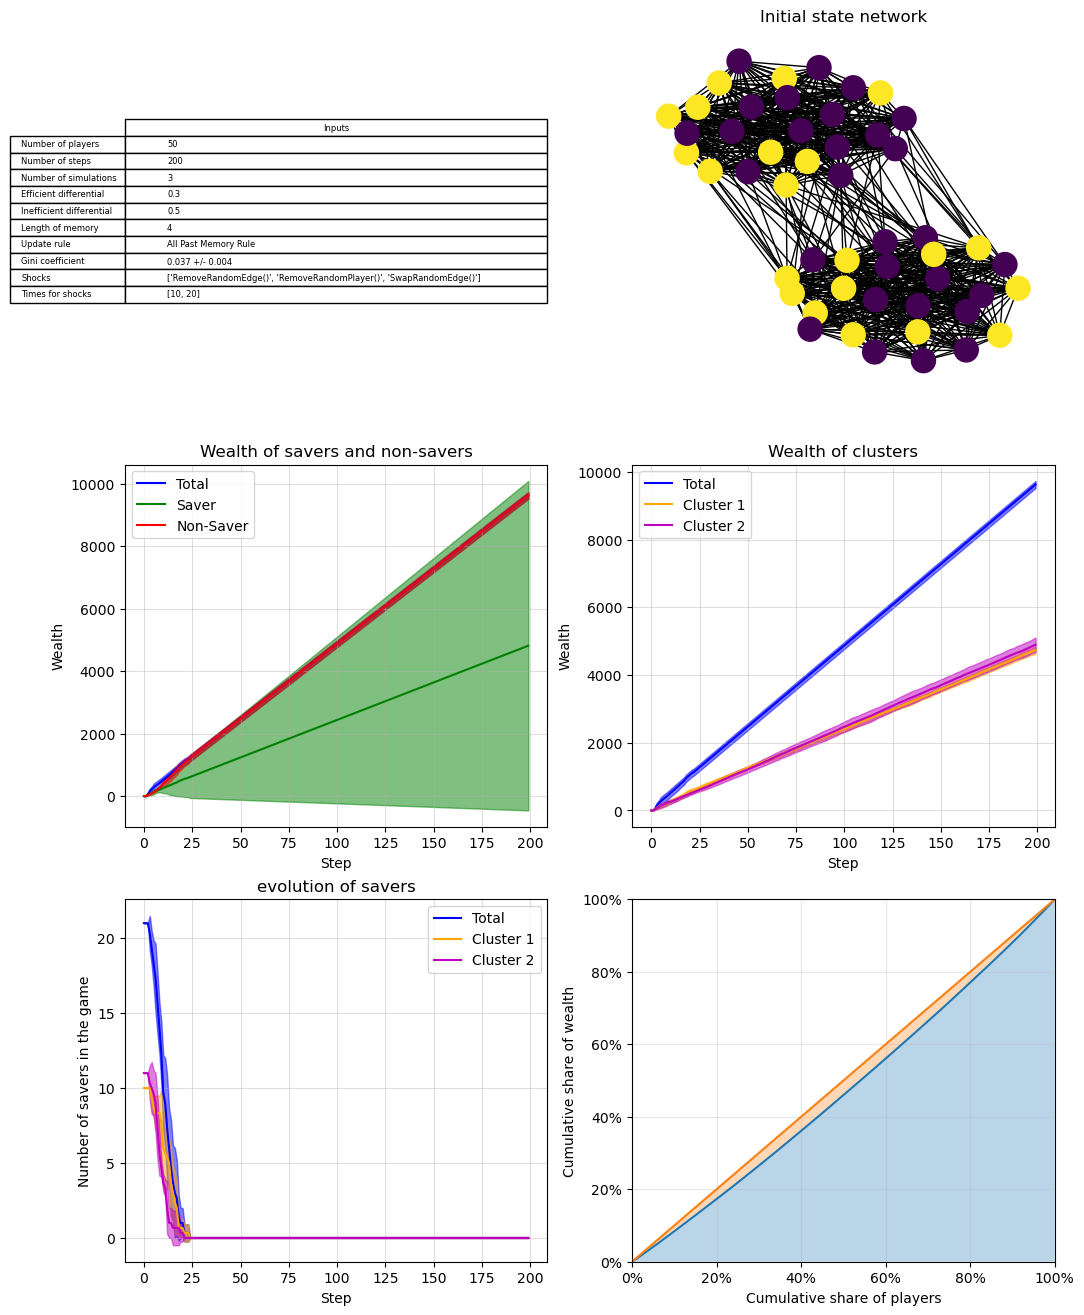

In [69]:
# If SBM
montecarlo_game_sbm(
# If another network, comment above and uncomment below
#montecarlo_game_network(g
    num_steps,
    num_simulations,
    num_players,
    threshold,
    differential_efficient,
    differential_inefficient,
    standard_deviation,
    memory_length,
    update_rule,
    shocks,
    )